In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.4 MB/s eta 0:00:00


In [ ]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
# import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)


In [ ]:
Main_Video_Path = Path("/content/drive/MyDrive/pro/train/")
Video_Path = list(Main_Video_Path.glob(r"*/*.mp4"))
Video_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path))
Video_Path_Series = pd.Series(Video_Path,name="MP4").astype(str)
Video_Labels_Series = pd.Series(Video_Labels,name="CATEGORY")
Main_MP4_Data = pd.concat([Video_Path_Series,Video_Labels_Series],axis=1)
Violence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "vi"]
NonViolence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "non"]

Violence_Data = Violence_Data.reset_index()
NonViolence_Data = NonViolence_Data.reset_index()

In [ ]:
FPS = 30
DELAY = int(100/FPS)
# when it is necessary

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
i=0
violence_frame_list = []

for file_video in Violence_Data.MP4:
    Video_File_Path = file_video

    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)

    while Video_Caption.isOpened():

        Current_Frame_ID = Video_Caption.get(1)

        ret,frame = Video_Caption.read()

        if ret != True:
            break

        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(64,64))
            violence_frame_list.append(Frame_Resize)
            # frame.save("/content/drive/MyDrive/data/image/"+str(i) +".jpg")
            cv2.imwrite("/content/drive/MyDrive/pro1/train1/vi1/"+str(i) +".jpg" ,frame )
            i=i+1
    Video_Caption.release()

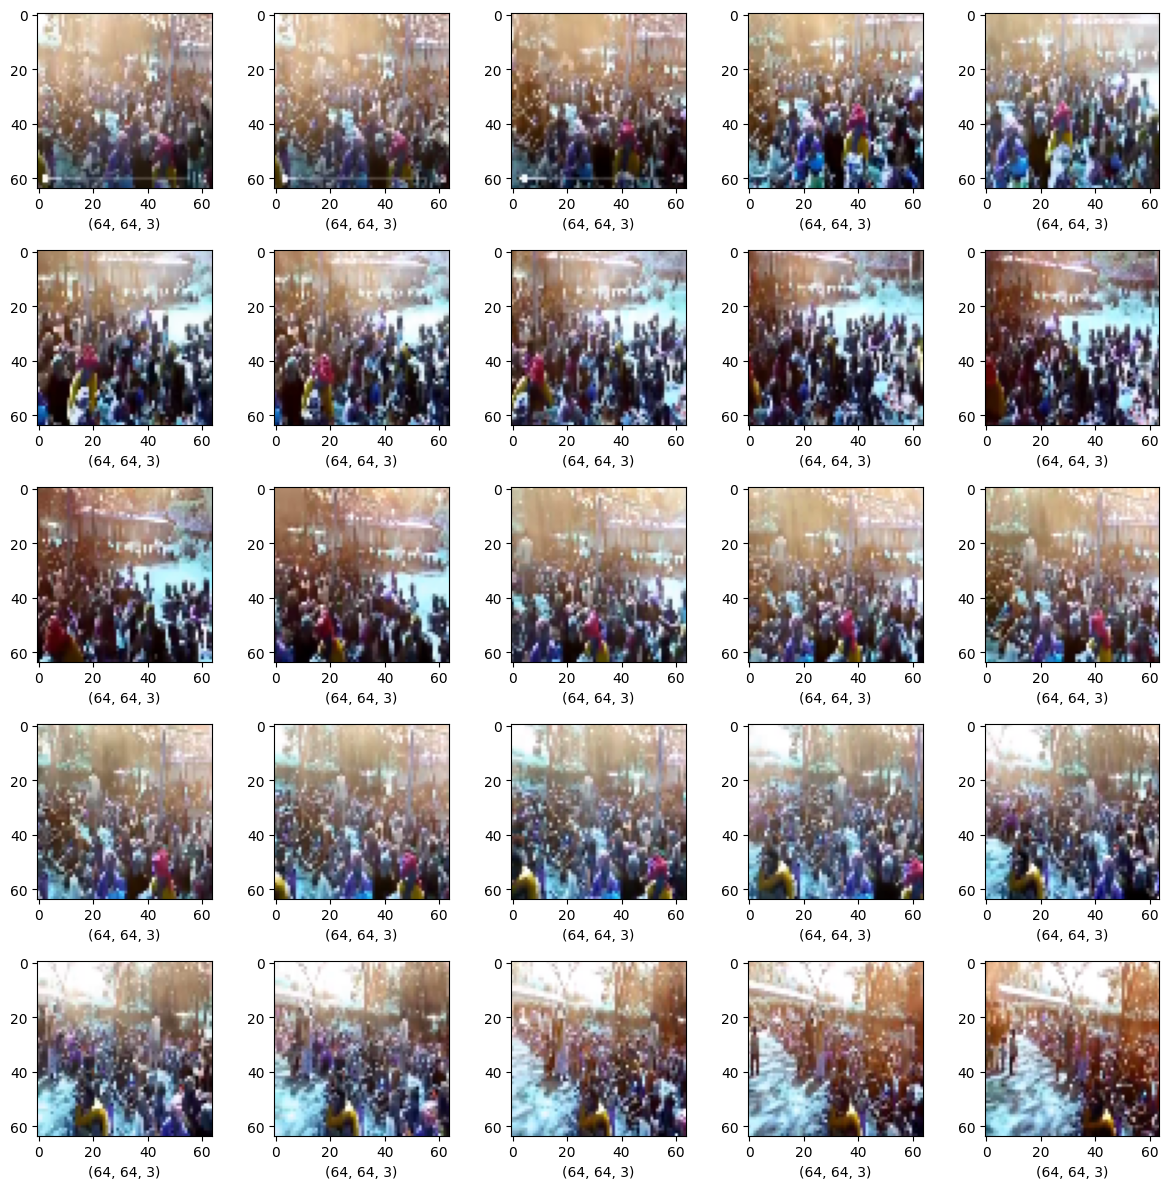

In [ ]:
figure,axis = plt.subplots(5,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):

    Img_Pick = violence_frame_list[i]

    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [ ]:
nonviolence_frame_list = []
import cv2
from google.colab.patches import cv2_imshow
i=0
for file_video in NonViolence_Data.MP4:
    Video_File_Path = file_video

    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)

    while Video_Caption.isOpened():

        Current_Frame_ID = Video_Caption.get(1)

        ret,frame = Video_Caption.read()

        if ret != True:
            break

        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(64,64))
            nonviolence_frame_list.append(Frame_Resize)
            cv2.imwrite("/content/drive/MyDrive/pro1/train1/non1/"+str(i) +".jpg" ,frame )
            i=i+1

    Video_Caption.release()

In [ ]:
print(len(nonviolence_frame_list))
# print(len(violence_frame_list))

3906


In [ ]:
prodir= "/content/drive/MyDrive/pro1/train1/non1/"
prodir2= "/content/drive/MyDrive/pro1/train1/vi1/"

In [ ]:
list1=[]
for filename in enumerate(os.listdir(prodir)):
  list1.append(filename)
print(len(list1))

3906


In [ ]:
list1=[]
for filename in enumerate(os.listdir(prodir2)):
  list1.append(filename)
print(len(list1))

5354


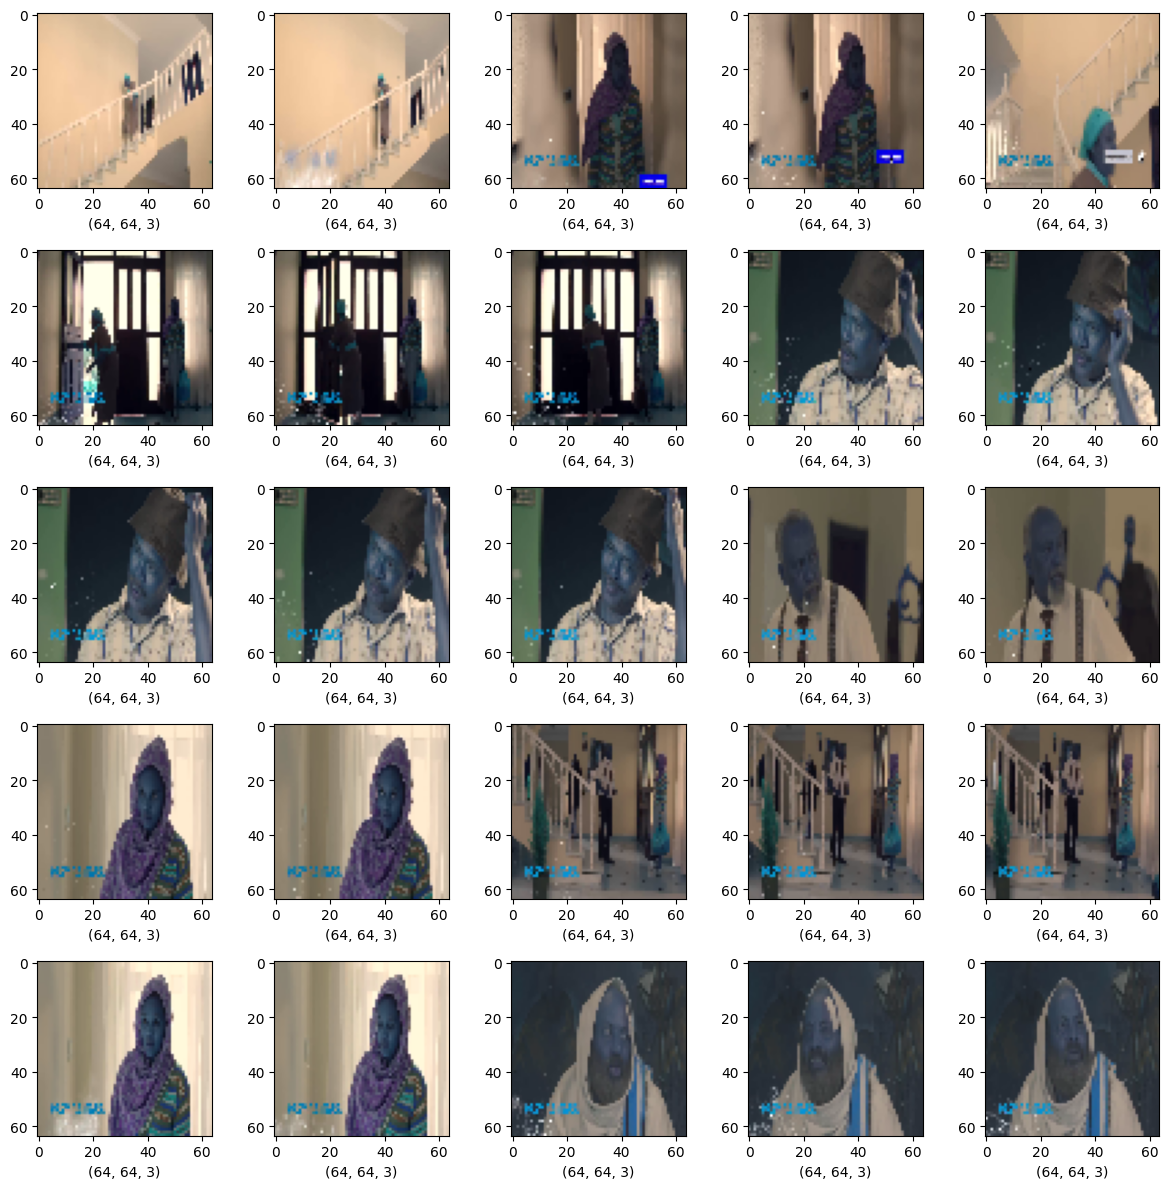

In [ ]:
figure,axis = plt.subplots(5,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):

    Img_Pick = nonviolence_frame_list[i]

    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [ ]:
Main_Video_Path = Path("/content/drive/MyDrive/pro/test/")
Video_Path = list(Main_Video_Path.glob(r"*/*.mp4"))
Video_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path))
Video_Path_Series = pd.Series(Video_Path,name="MP4").astype(str)
Video_Labels_Series = pd.Series(Video_Labels,name="CATEGORY")
Main_MP4_Data = pd.concat([Video_Path_Series,Video_Labels_Series],axis=1)
Violence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "vi"]
NonViolence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "non"]

Violence_Data = Violence_Data.reset_index()
NonViolence_Data = NonViolence_Data.reset_index()

In [ ]:
FPS = 30
DELAY = int(100/FPS)
# when it is necessary

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
i=0
violence_frame_list = []

for file_video in Violence_Data.MP4:
    Video_File_Path = file_video

    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)

    while Video_Caption.isOpened():

        Current_Frame_ID = Video_Caption.get(1)

        ret,frame = Video_Caption.read()

        if ret != True:
            break

        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(64,64))
            violence_frame_list.append(Frame_Resize)
            # frame.save("/content/drive/MyDrive/data/image/"+str(i) +".jpg")
            cv2.imwrite("/content/drive/MyDrive/pro1/test1/vi1/"+str(i) +".jpg" ,frame )
            i=i+1
    Video_Caption.release()

IndexError: ignored

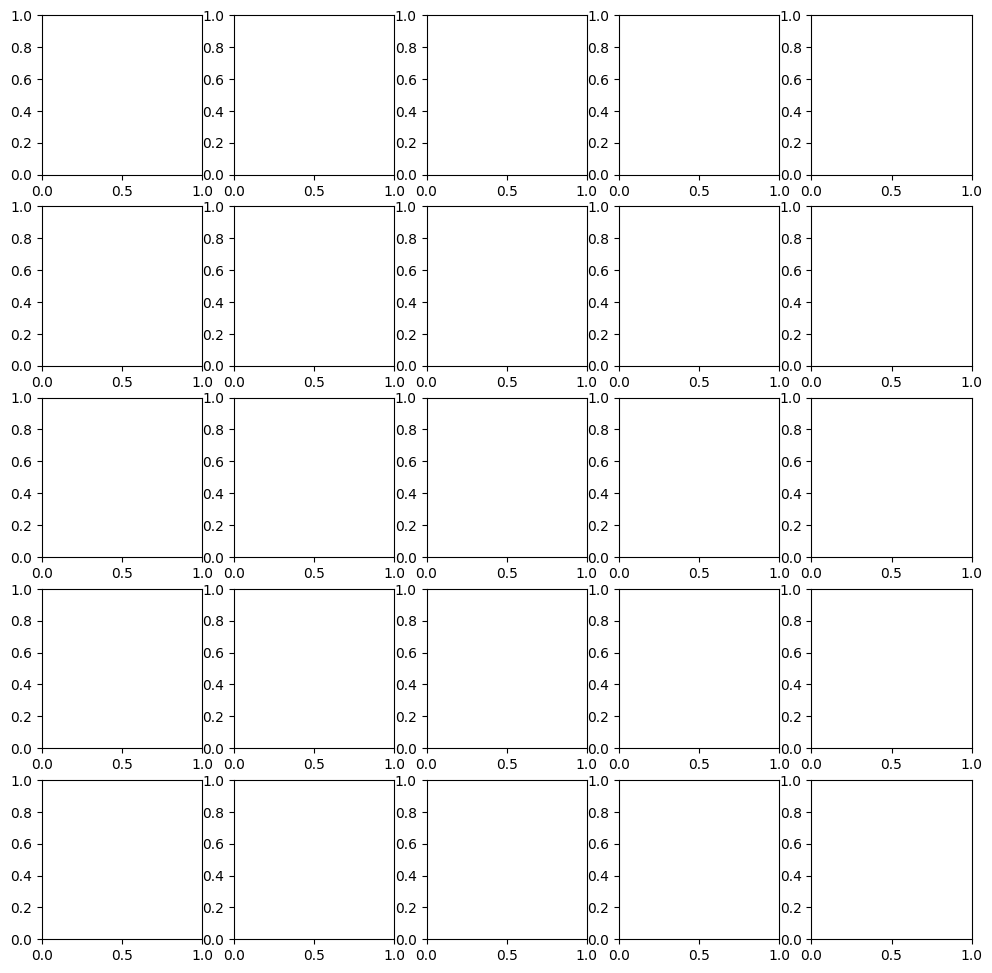

In [ ]:
figure,axis = plt.subplots(5,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):

    Img_Pick = violence_frameT[i]

    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [ ]:
nonviolence_frameT = []
import cv2
from google.colab.patches import cv2_imshow
i=0
for file_video in NonViolence_Data.MP4:
    Video_File_Path = file_video

    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)

    while Video_Caption.isOpened():

        Current_Frame_ID = Video_Caption.get(1)

        ret,frame = Video_Caption.read()

        if ret != True:
            break

        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(64,64))
            nonviolence_frame_list.append(Frame_Resize)
            cv2.imwrite("/content/drive/MyDrive/pro1/test1/non1/"+str(i) +".jpg" ,frame )
            i=i+1

    Video_Caption.release()

IndexError: ignored

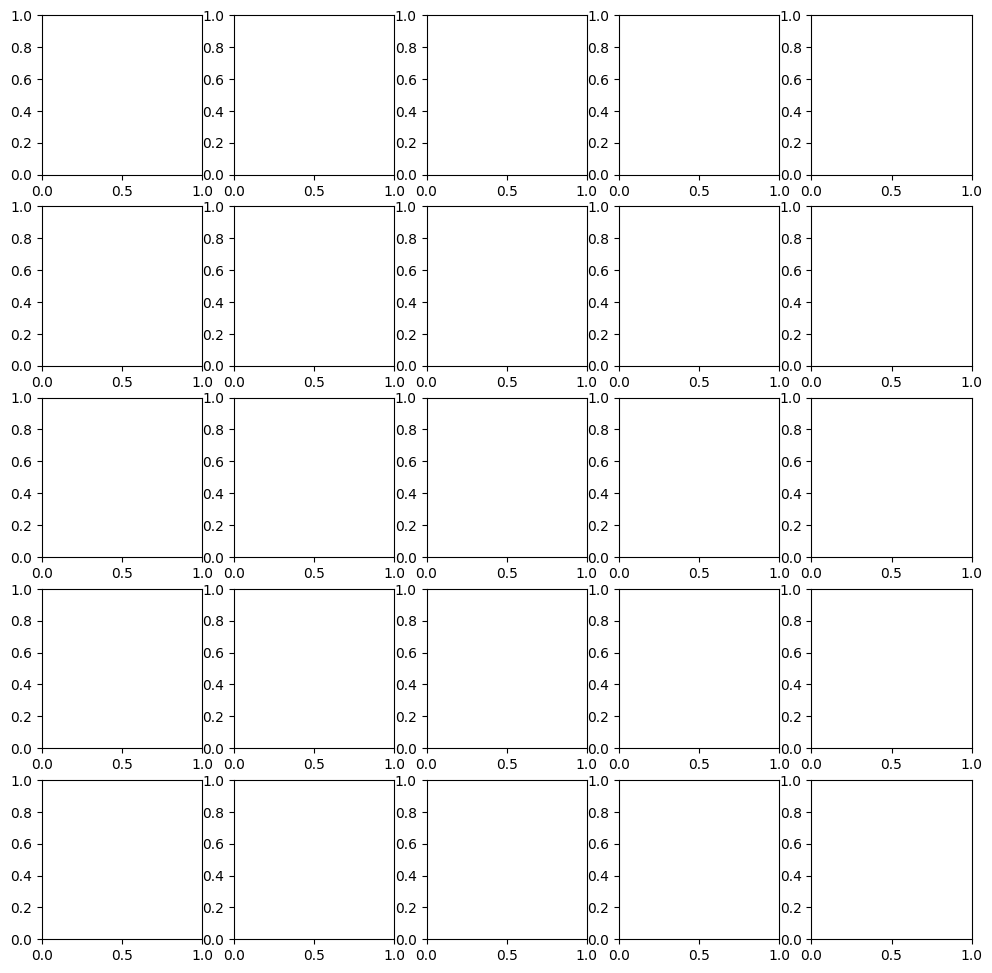

In [ ]:
figure,axis = plt.subplots(5,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):

    Img_Pick = nonviolence_frameT[i]

    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [ ]:
print(len(nonviolence_frame_list))
print(len(violence_frame_list))

3650


NameError: ignored

In [ ]:
prodir= "/content/drive/MyDrive/pro1/test1/non1/"
prodir2= "/content/drive/MyDrive/pro1/test1/vi1/"

In [ ]:
list1=[]
for filename in enumerate(os.listdir(prodir)):
  list1.append(filename)
print(len(list1))

1319


In [ ]:
list1=[]
for filename in enumerate(os.listdir(prodir2)):
  list1.append(filename)
print(len(list1))

FileNotFoundError: ignored

In [ ]:
Main_Video_Path = Path("/content/drive/MyDrive/pro/val/")
Video_Path = list(Main_Video_Path.glob(r"*/*.mp4"))
Video_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path))
Video_Path_Series = pd.Series(Video_Path,name="MP4").astype(str)
Video_Labels_Series = pd.Series(Video_Labels,name="CATEGORY")
Main_MP4_Data = pd.concat([Video_Path_Series,Video_Labels_Series],axis=1)
Violence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "vi"]
NonViolence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "non"]

Violence_Data = Violence_Data.reset_index()
NonViolence_Data = NonViolence_Data.reset_index()

In [ ]:
FPS = 30
DELAY = int(100/FPS)
# when it is necessary

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
i=0
violence_frame_list = []

for file_video in Violence_Data.MP4:
    Video_File_Path = file_video

    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)

    while Video_Caption.isOpened():

        Current_Frame_ID = Video_Caption.get(1)

        ret,frame = Video_Caption.read()

        if ret != True:
            break

        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(64,64))
            violence_frame_list.append(Frame_Resize)
            # frame.save("/content/drive/MyDrive/data/image/"+str(i) +".jpg")
            cv2.imwrite("/content/drive/MyDrive/pro1/val/vi1/"+str(i) +".jpg" ,frame )
            i=i+1
    Video_Caption.release()

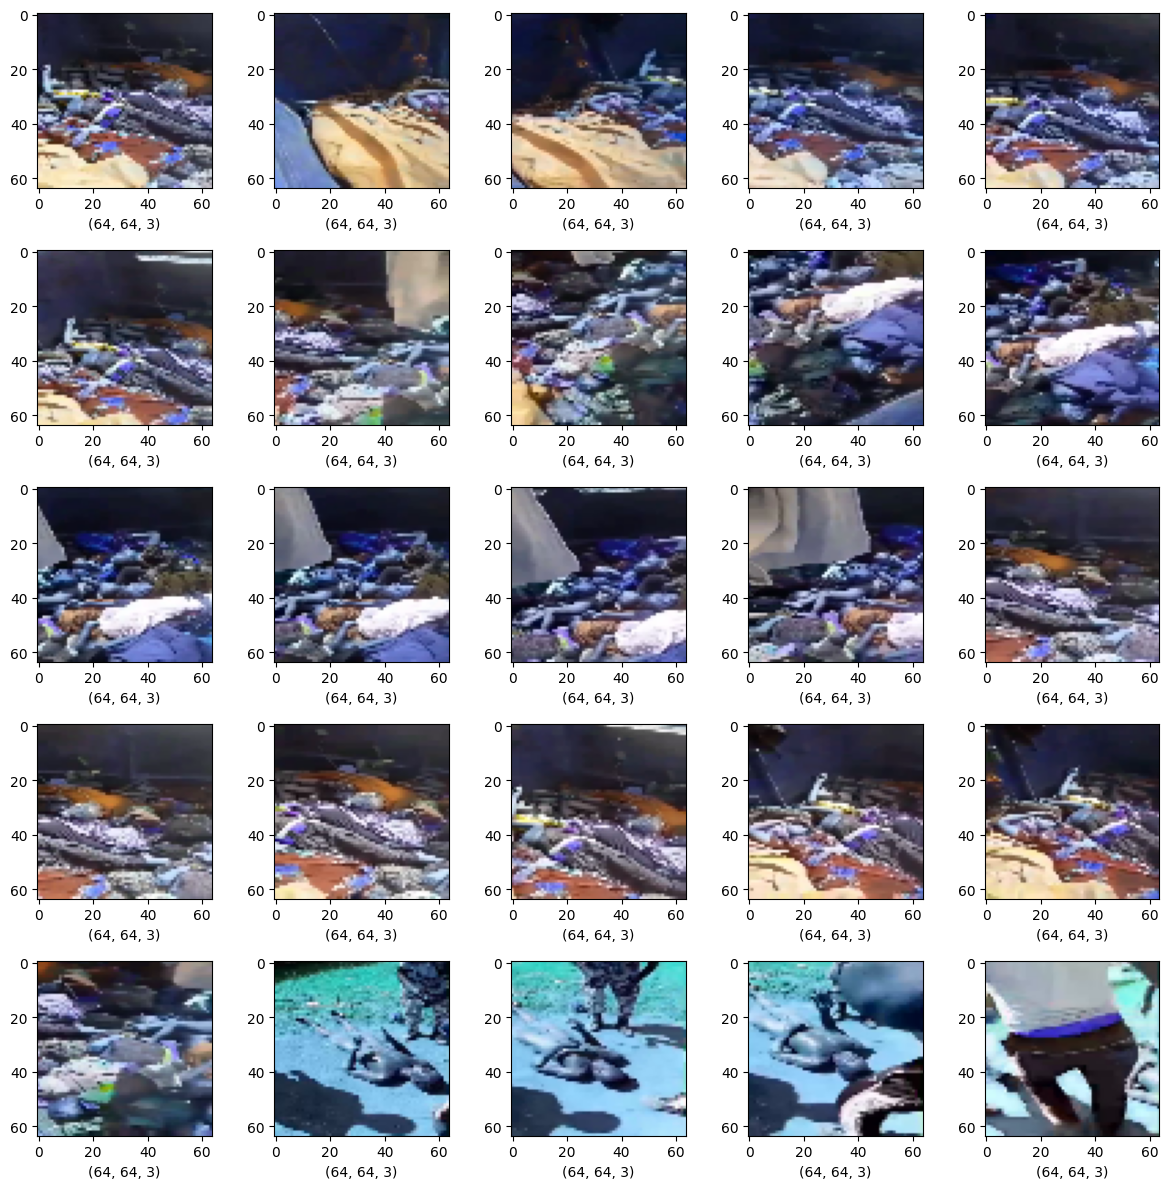

In [ ]:
figure,axis = plt.subplots(5,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):

    Img_Pick = violence_frame_list[i]

    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [ ]:
nonviolence_frame_list = []
import cv2
from google.colab.patches import cv2_imshow
i=0
for file_video in NonViolence_Data.MP4:
    Video_File_Path = file_video

    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)

    while Video_Caption.isOpened():

        Current_Frame_ID = Video_Caption.get(1)

        ret,frame = Video_Caption.read()

        if ret != True:
            break

        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(64,64))
            nonviolence_frame_list.append(Frame_Resize)
            cv2.imwrite("/content/drive/MyDrive/pro1/val/non1/"+str(i) +".jpg" ,frame )
            i=i+1

    Video_Caption.release()

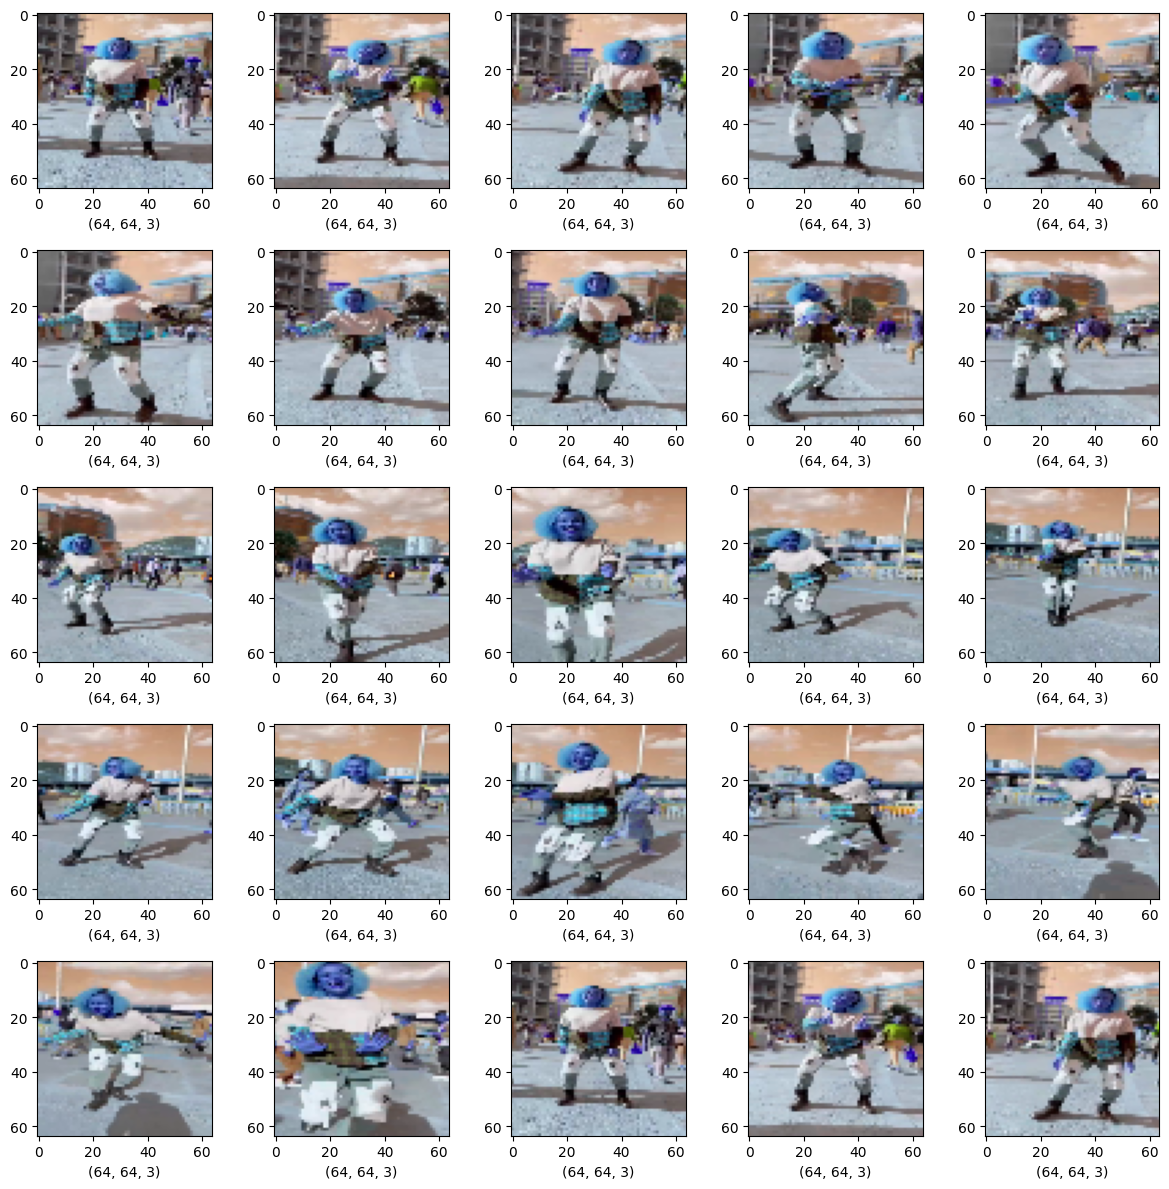

In [ ]:
figure,axis = plt.subplots(5,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):

    Img_Pick = nonviolence_frame_list[i]

    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [ ]:
print(len(nonviolence_frame_list))
print(len(violence_frame_list))

302
485


In [ ]:
#import librabries
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns
from os import listdir
import matplotlib.cm as cm
from keras.models import Sequential
from keras.models import Model, load_model
from keras.optimizers import adam
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,InputLayer,Flatten, Dropout, Dense,Activation
!pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Data Augmentation and Preprocessing
import splitfolders
IMAGE_SIZE = 256
BATCH_SIZE =8
EPOCHS = 10
CHANNELS=3
LR = 1e-4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/pro1', output="pri/", seed=1718, ratio=(0.8, 0.1,0.1))


In [ ]:
Image_Generator = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.3,
    fill_mode="reflect"
)

In [ ]:
train_generator=Image_Generator.flow_from_directory(
   '/content/drive/MyDrive/pro1/train1',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    color_mode="rgb",
    shuffle=True,
    seed=123
)

In [ ]:
val_datagen=ImageDataGenerator(
    rescale=1.0/255,
)
val_generator=val_datagen.flow_from_directory(
  '/content/drive/MyDrive/pro1/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    class_mode="sparse",
    shuffle=True,
    seed=123
)


In [ ]:
test_datagen=ImageDataGenerator(
    rescale=1.0/255,
)
test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/pro1/test1',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    class_mode="sparse",
)

In [ ]:
train_generator.samples,val_generator.samples,test_generator.samples

In [ ]:
class_name_indices=train_generator.class_indices
class_names=list(class_name_indices.keys())
class_names

In [ ]:
#shape of input dataset
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  break

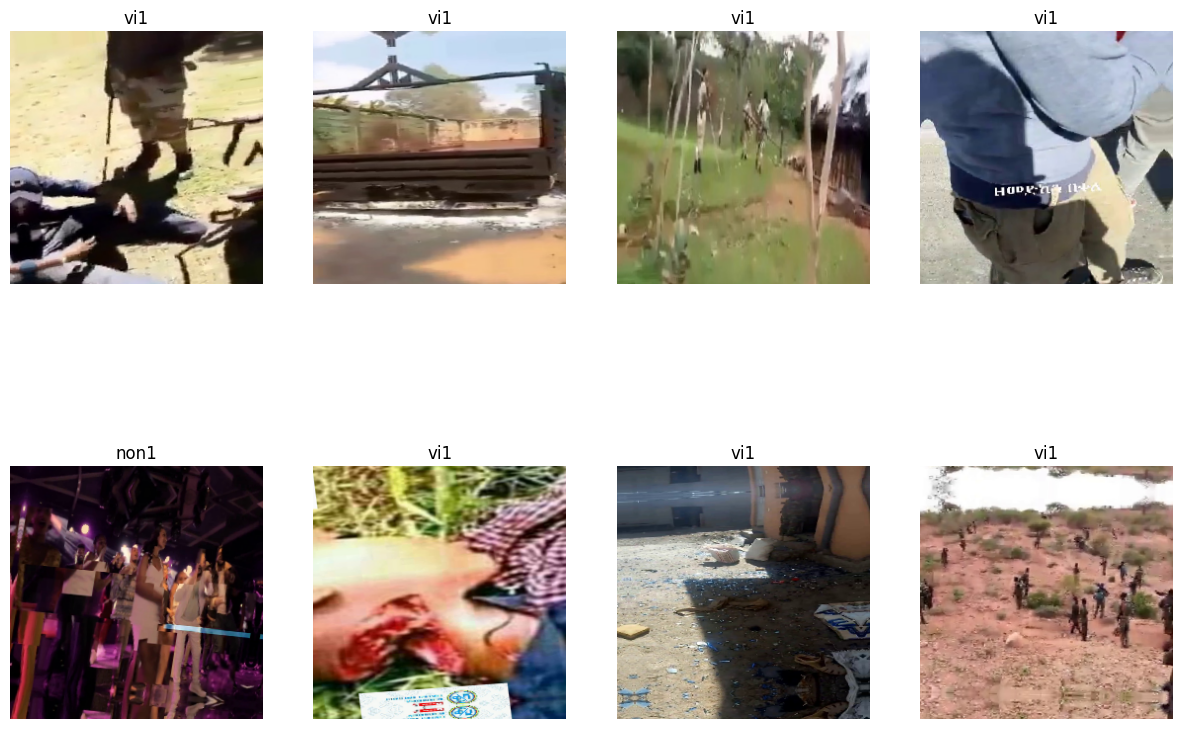

In [ ]:
#Visualization training data
plt.figure(figsize=(15,16))
for image_batch,label_batch in train_generator:
    for i in range(8):
        plt.subplot(3,4,i+1)
        plt.imshow((image_batch[i]*255).astype(np.uint8))
        plt.title( class_names[int(label_batch[i])])
        plt.axis('off')
    break

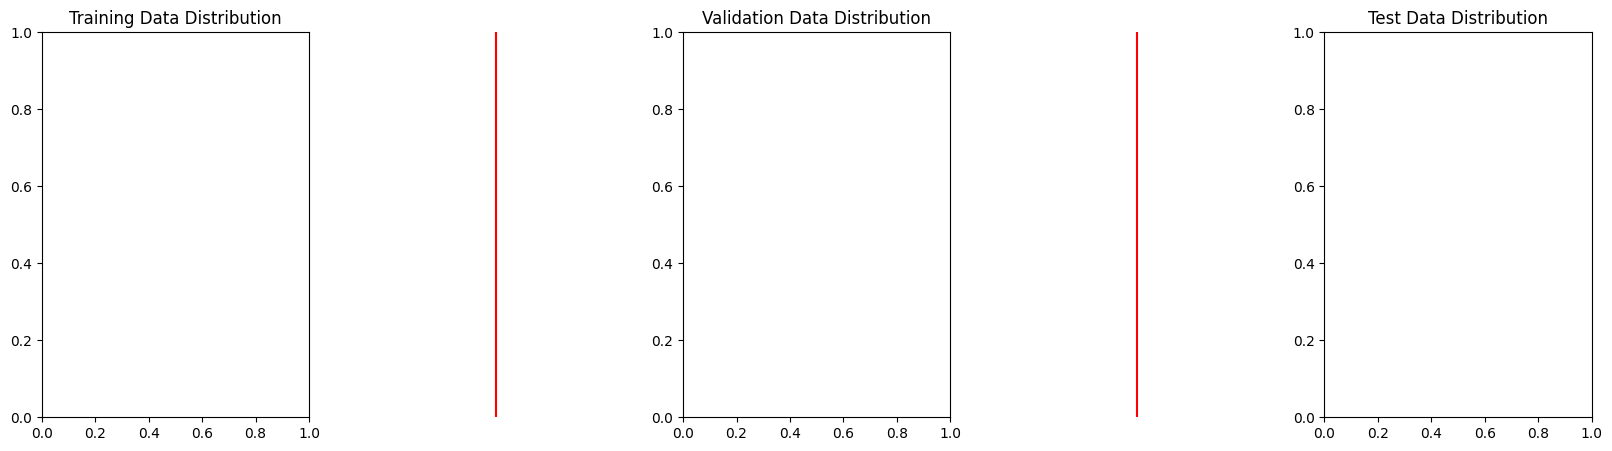

In [ ]:
#Visualize distribusion of labels in train,validation and test datasets

plt.figure(figsize=(20,5))
colors = ['r','y','g','b']
#accuracy graph
plt.subplot(1,5,1)
cls_train=train_generator.classes
class_name = list(train_generator.class_indices.keys())
unique_class_index, countt = np.unique(cls_train, return_counts=True)
number_img = (countt)#number of image
# plt.pie(number_img, labels = class_name,radius=1.2, colors=colors ,shadow = True, explode = (0.05, , 0.05, 0.05), autopct = '%1.1f%%')
plt.title('Training Data Distribution')

# Separator
plt.subplot(1,5,2)
plt.axvline(x = 7, color = 'r')
plt.axis('off')

#val chart
plt.subplot(1,5,3)
cls_val=val_generator.classes
goal_type = list(val_generator.class_indices.keys())
uniqu, count = np.unique(cls_val, return_counts=True)
goals = (count)
# plt.pie(goals, labels = goal_type, colors=colors,radius=1.2 ,shadow = True, explode = (0.05, 0.05, 0.05, 0.05), autopct = '%1.1f%%')
plt.title('Validation Data Distribution')

#Separator
plt.subplot(1,5,4)
plt.axvline(x = 7, color = 'r')
plt.axis('off')

#test chart
plt.subplot(1,5,5)
cls_test=test_generator.classes
goal_types = list(test_generator.class_indices.keys())
unique, counts = np.unique(cls_test, return_counts=True)
goal = (counts)
colors = ['r','y','g','b']
# plt.pie(goal, labels = goal_types, radius=1.2,colors=colors ,shadow = True, explode = (0.05, 0.05, 0.05, 0.05), autopct = '%1.1f%%')
plt.title('Test Data Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
colors = ['r','y','g']
class_name = ['train','val','test']
train_length = len(list(cls_train))
test_length = len(list(cls_test))
val_length = len(list(cls_val))
x=(train_length,val_length,test_length)
plt.title('Data Distribution')
plt.pie(x, labels = class_name,radius=1.2, colors=colors ,shadow = True,  autopct = '%1.1f%%')
plt.show()

In [ ]:

input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model =Sequential([
        InputLayer(input_shape=input_shape),


       Conv2D(32, (3,3),padding='same', activation='relu'),
         MaxPooling2D((2, 2)),

          Conv2D(64, (3,3),padding='same', activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(128, (3,3),padding='same', activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(256, (3,3), padding='same',activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(512, (3, 3),padding='same',activation='relu'),
         MaxPooling2D((2, 2)),

         Conv2D(1024, (3, 3),padding='same',activation='relu'),
         MaxPooling2D((2, 2)),
         Dropout(0.5),

         Conv2D(1024, (3, 3),padding='same',activation='relu'),
         MaxPooling2D((2, 2)),
         Dropout(0.5),

         Flatten(),

         Dense(1024,activation='relu'),
         Dense(128,activation='relu'),

         Dense(64,activation='relu'),

         Dense(4,activation='softmax')
])

In [ ]:
model.summary()


In [ ]:
model_check_point=ModelCheckpoint(filepath="coffee/best_model.h5",
                   monitor="val_loss",
                   verbose=0,
                   save_best_only=True)
early_stop=EarlyStopping(monitor="val_accuracy",patience=30,verbose=1)
log_csv=CSVLogger('coffee/my_logs.csv',separator=',',append=False)
call_backs=[model_check_point,early_stop,log_csv]
opt = tf.keras.optimizers.legacy.Adam(learning_rate=LR,decay=LR/ EPOCHS)

In [ ]:
#Compile model

model.compile(
optimizer=opt,
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])
print("[INFO] training network...")



In [ ]:
steps_per_epoch=int((train_generator.samples)/BATCH_SIZE)
validation_step=int((val_generator.samples)/BATCH_SIZE)
steps_per_epoch,validation_step


In [ ]:
#Train Model
history=model.fit(
     train_generator,
     verbose=1,
     epochs=1,
     callbacks=call_backs,
     batch_size=BATCH_SIZE,
     validation_data=val_generator,
     steps_per_epoch=steps_per_epoch,
     validation_steps=validation_step

)